https://stackoverflow.com/questions/77669310/double-exponential-fit-in-python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.metrics import r2_score

In [2]:
t0 = np.array([-0.5, -0.4, -0.3, -0.2, -0.1, 0., 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.27, 0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6, 0.63, 0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.9, 0.93, 0.96, 0.99, 1.02, 1.05, 1.08, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.])
x1 = np.array([0., 0.08362, 0.05064, 0.0498, 0.03706667, 0.27215333, 1.47517, 1.62150333, 1.72074667, 1.85051667, 1.81913, 1.89994, 1.96591667, 1.98604667, 2.08784333, 2.07969333, 2.09007, 2.06054333, 2.1477, 2.08343, 2.08434, 2.02111, 1.96873, 1.96056333, 1.89549667, 1.82184333, 1.70469, 1.47502667, 1.30257667, 1.09063333, 0.95496333, 0.87091333, 0.73064667, 0.59721333, 0.53186333, 0.47225, 0.41566667, 0.36025, 0.31752, 0.30499667, 0.26868, 0.21355667, 0.19169, 0.17645, 0.14872667, 0.10706667, 0.12724667, 0.1013, 0.08720333, 0.09477333, 0.09134, 0.10958, 0.08022667, 0.09363, 0.08076667, 0.09006, 0.09902, 0.07093333, 0.09918, 0.10192, 0.09432333, 0.09079333, 0.10425, 0.09839667])
x2 = np.array([0., -0.12552667, -0.15764, -0.19444, -0.26223, -0.35566333, -1.2022, -1.30988667, -1.44820667, -1.49741333, -1.66169333, -1.72277667, -1.81840667, -1.92772333, -1.97253333, -2.10094667, -2.21817667, -2.24875333, -2.43420667, -2.47216, -2.50555667, -2.62232333, -2.65796667, -2.68747333, -2.69612667, -2.71442, -2.59840333, -2.56071667, -2.44539333, -2.28093667, -2.23737, -2.09984333, -2.07465667, -2.04232667, -1.95166667, -1.93045333, -1.89963333, -1.92825667, -1.98861667, -1.93057667, -2.00662333, -1.91338667, -1.92764, -2.03428, -2.04880667, -1.98233667, -1.90731333, -2.00939667, -1.92832, -1.93799, -1.89133, -1.90807, -1.97912, -1.99034667, -1.95203333, -1.85398667, -1.86426667, -1.85729667, -1.86018667, -1.92405, -1.88595667, -1.88160667, -1.82243333, -1.87084667])

In [3]:
q = (t0 >= 0.)
t0 = t0[q]
x1 = x1[q]
x2 = x2[q]

In [4]:
def model2(x, a, b, c, d, e):
    return a * np.exp(-b * x) + c * np.exp(-d * x) + e

In [5]:
def model2(x, a, b, c, d):
    return a * x * np.exp(-b * x) - c *(1 - np.exp(-d * x))

In [6]:
popt1, pcov1 = optimize.curve_fit(model2, t0, x1)

(array([ 3.85903575e+01,  6.84925174e+00,  2.42361762e-02, -9.12847012e-01]),
 array([[0.44760132, 0.05386743, 0.01048778, 0.19496296],
        [0.05386743, 0.00822338, 0.00224154, 0.04191002],
        [0.01048778, 0.00224154, 0.00249973, 0.04831067],
        [0.19496296, 0.04191002, 0.04831067, 0.9471787 ]]))

In [14]:
x1hat = model2(t0, *popt1)
score1 = r2_score(x1, x1hat)
score1

0.9932075193845648

In [7]:
popt2, pcov2 = optimize.curve_fit(model2, t0, x2) #, p0 = [-1, 1, -1, 1, 1])
popt2, pcov2

(array([-23.77125047,   5.21925912,   1.95317437,   2.20996689]),
 array([[ 0.90925921,  0.00741302, -0.04303857,  0.25044186],
        [ 0.00741302,  0.14738189, -0.02429899,  0.22796133],
        [-0.04303857, -0.02429899,  0.00861674, -0.05510877],
        [ 0.25044186,  0.22796133, -0.05510877,  0.43753774]]))

In [15]:
x2hat = model2(t0, *popt2)
score2 = r2_score(x2, x2hat)
score2

0.8745479038673547

In [8]:
tlin = np.linspace(t0.min(), t0.max(), 200)
x1hat = model2(tlin, *popt1)
x2hat = model2(tlin, *popt2)

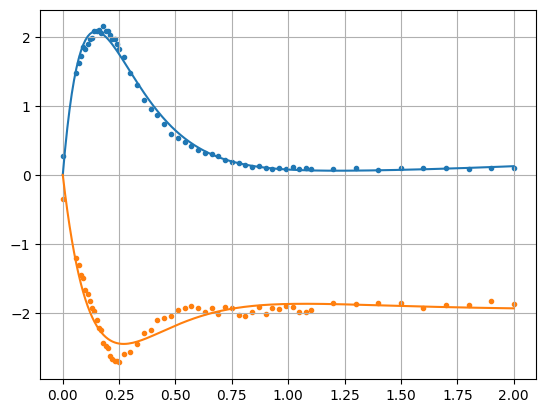

In [9]:
fig, axe = plt.subplots()
axe.scatter(t0, x1, marker=".")
axe.scatter(t0, x2, marker=".")
axe.plot(tlin, x1hat)
axe.plot(tlin, x2hat)
axe.grid()